# **Linear Regression & EDA on PISA** 
    Dep  : Department of E-Business - Undergraduate, AJOU School of Business, Ajou University
    Code : 201823869 
    Name : seongwoo Cho

<br>

#### **INDEX** 

&nbsp;&nbsp;&nbsp; **1-1. EDA <br><br>**
&nbsp;&nbsp;&nbsp; **1-2. Data Processing <br>**
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - Cleaning missing values <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - Converting categorical variables to dummies <br><br>
&nbsp;&nbsp;&nbsp; **1-3. Linear Regression : Model Building** <br><br>
&nbsp;&nbsp;&nbsp; **1-4. Explanations on the model** <br><br>
&nbsp;&nbsp;&nbsp; **1-5. Model Evaluation** <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - Comparing the actual score with prediction <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - Residual Histogram <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - Computing the errors <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - MAE, MSE, RMSE <br><br>

<br><br>

# Summary
The main purpose of this book is building a linear regression model for predicting 'DV:readingScore' by using the other variables.<br>
It includes EDA, Cleaning, Building Model, Explanations, and Model Evaluation.
<br><br>

## *Preparing*


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pisa_train = pd.read_csv('../input/pisa2009test/pisa2009train.csv')


<br>

# **1-1. EDA**

**Data** : The Program for International Student Assessment (PISA) is a test given to 15-year-old students around the world to evaluate their performance in mathematics, reading, and science every three years. The test provides a quantitative way to compare the performance of students globally. You need to predict the reading scores of the U.S. students on the 2009 PISA exam.* <br><br>


## ***(1) Head observations***

In [2]:
pisa_train.head()

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,...,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
0,11,1,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,...,0.0,1.0,0.0,225.0,NaN,1.0,1,1,673.0,476.00
1,11,1,White,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,450.0,25.0,1.0,1,0,1173.0,575.01
2,9,1,White,1.0,1.0,1.0,1.0,1.0,1.0,NaN,...,1.0,1.0,0.0,250.0,28.0,1.0,1,0,1233.0,554.81
3,10,0,Black,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,200.0,23.0,1.0,1,1,2640.0,458.11
4,10,1,Hispanic,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,250.0,35.0,1.0,1,1,1095.0,613.89


<br>

#### ***(2) Information of the dataset' structure***

In [3]:
pisa_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3663 entries, 0 to 3662
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   grade                  3663 non-null   int64  
 1   male                   3663 non-null   int64  
 2   raceeth                3628 non-null   object 
 3   preschool              3607 non-null   float64
 4   expectBachelors        3601 non-null   float64
 5   motherHS               3566 non-null   float64
 6   motherBachelors        3266 non-null   float64
 7   motherWork             3570 non-null   float64
 8   fatherHS               3418 non-null   float64
 9   fatherBachelors        3094 non-null   float64
 10  fatherWork             3430 non-null   float64
 11  selfBornUS             3594 non-null   float64
 12  motherBornUS           3592 non-null   float64
 13  fatherBornUS           3550 non-null   float64
 14  englishAtHome          3592 non-null   float64
 15  comp

<br>

#### ***(3) Baisc descriptive analysis on the dataset***

In [4]:
pisa_train.describe()

,grade,male,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,...,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
count,3663.000000,3663.000000,3607.000000,3601.000000,3566.000000,3266.000000,3570.000000,3418.000000,3094.000000,3430.000000,...,3592.000000,3598.000000,3629.000000,3477.000000,3414.000000,3520.000000,3663.000000,3663.000000,3501.000000,3663.000000
mean,10.089817,0.511057,0.722761,0.785893,0.879978,0.348132,0.734454,0.859274,0.331933,0.853061,...,0.871659,0.899389,0.289887,266.208225,24.499414,0.967614,0.933934,0.384930,1369.316767,497.911403
std,0.554375,0.499946,0.447697,0.410259,0.325033,0.476451,0.441685,0.347789,0.470983,0.354096,...,0.334515,0.300855,0.453772,148.403525,7.184348,0.177049,0.248431,0.486645,869.983618,95.515153
min,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,100.000000,168.550000
25%,10.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,225.000000,20.000000,1.000000,1.000000,0.000000,712.000000,431.705000
50%,10.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,250.000000,25.000000,1.000000,1.000000,0.000000,1212.000000,499.660000
75%,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,300.000000,30.000000,1.000000,1.000000,1.000000,1900.000000,566.230000
max,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,2400.000000,75.000000,1.000000,1.000000,1.000000,6694.000000,746.000000


<br>

#### ***(4) Figuring out missing values***

In [5]:
pisa_train.isnull().sum()

grade                      0
male                       0
raceeth                   35
preschool                 56
expectBachelors           62
motherHS                  97
motherBachelors          397
motherWork                93
fatherHS                 245
fatherBachelors          569
fatherWork               233
selfBornUS                69
motherBornUS              71
fatherBornUS             113
englishAtHome             71
computerForSchoolwork     65
read30MinsADay            34
minutesPerWeekEnglish    186
studentsInEnglish        249
schoolHasLibrary         143
publicSchool               0
urban                      0
schoolSize               162
readingScore               0
dtype: int64

<br>

#### ***(5) BoxPlot : readingScore***

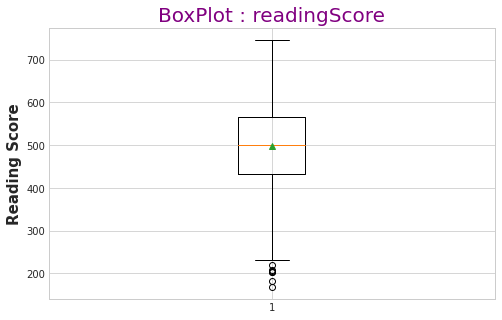

In [6]:
# Box plot 
# for reading score
plt.style.use('seaborn-whitegrid')


plt.figure(figsize=(8,5))
plt.boxplot(pisa_train['readingScore'],showmeans=True)

plt.ylabel('Reading Score',fontsize=15,fontweight='bold')
plt.title('BoxPlot : readingScore',fontsize=20,color='purple')

plt.show()

<br>

#### ***(6) Bar chart : Counts by race***
It shows the majority of records by race is 'White'<br>
I'm gonna select 'white' as reference categories for creating race dummies.

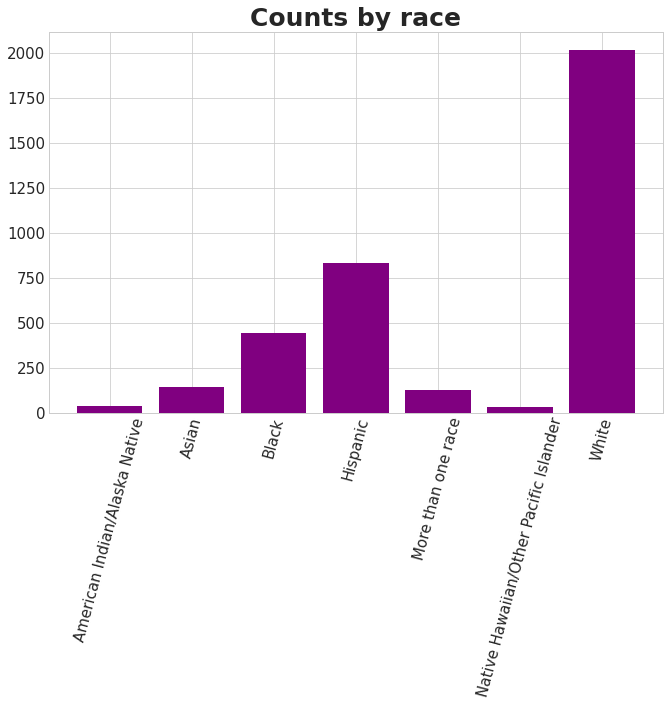

In [7]:
# bar chart
# showing race counts
pisa_race_tarin = pisa_train.groupby('raceeth')['raceeth'].count()

plt.figure(figsize=(11,7))
plt.title('Counts by race',fontsize=25,fontweight='bold')
plt.xticks(rotation=75,fontsize=15)
plt.yticks(fontsize=15)
plt.bar(pisa_race_tarin.index, pisa_race_tarin.values, color='purple')
plt.show()

<br>

#### ***(7) Bar chart : Average score by race***
The bar chart shows average reading score of asian is the highest one.

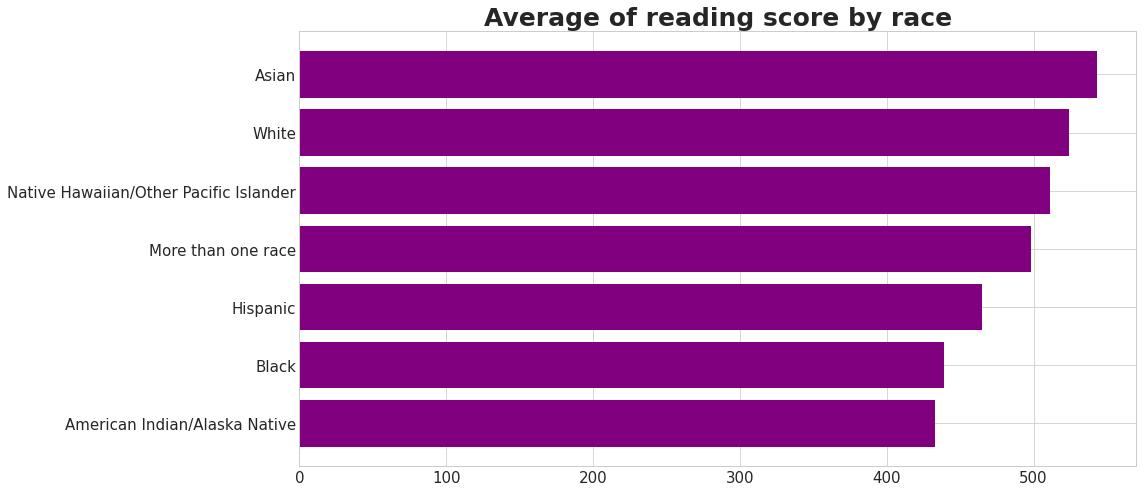

In [8]:
# barchart
# showing average score by race

pisa_avgScore_byRace_train = pisa_train.groupby('raceeth')['readingScore'].mean().sort_values(ascending=True)

plt.figure(figsize=(15,8))
plt.title('Average of reading score by race',fontsize=25,fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.barh(pisa_avgScore_byRace_train.index, pisa_avgScore_byRace_train.values ,color='purple')


plt.show()


<br>

#### ***(8) Correlations & Pair Plot(Train)***

                          grade      male  preschool  expectBachelors  \
grade                  1.000000 -0.097677  -0.023262         0.140200   
male                  -0.097677  1.000000   0.014807        -0.078029   
preschool             -0.023262  0.014807   1.000000         0.076046   
expectBachelors        0.140200 -0.078029   0.076046         1.000000   
motherHS               0.005461  0.030586   0.141552         0.104886   
motherBachelors        0.043171  0.074250   0.151832         0.168330   
motherWork             0.019385 -0.011641   0.069249         0.069366   
fatherHS               0.046210  0.017784   0.117443         0.156028   
fatherBachelors        0.061713  0.076257   0.141418         0.199217   
fatherWork             0.012731  0.030614   0.065079         0.003122   
selfBornUS            -0.022154  0.022550   0.092893        -0.010330   
motherBornUS          -0.072814  0.015107   0.111684         0.012359   
fatherBornUS          -0.063530  0.008212   0.11220

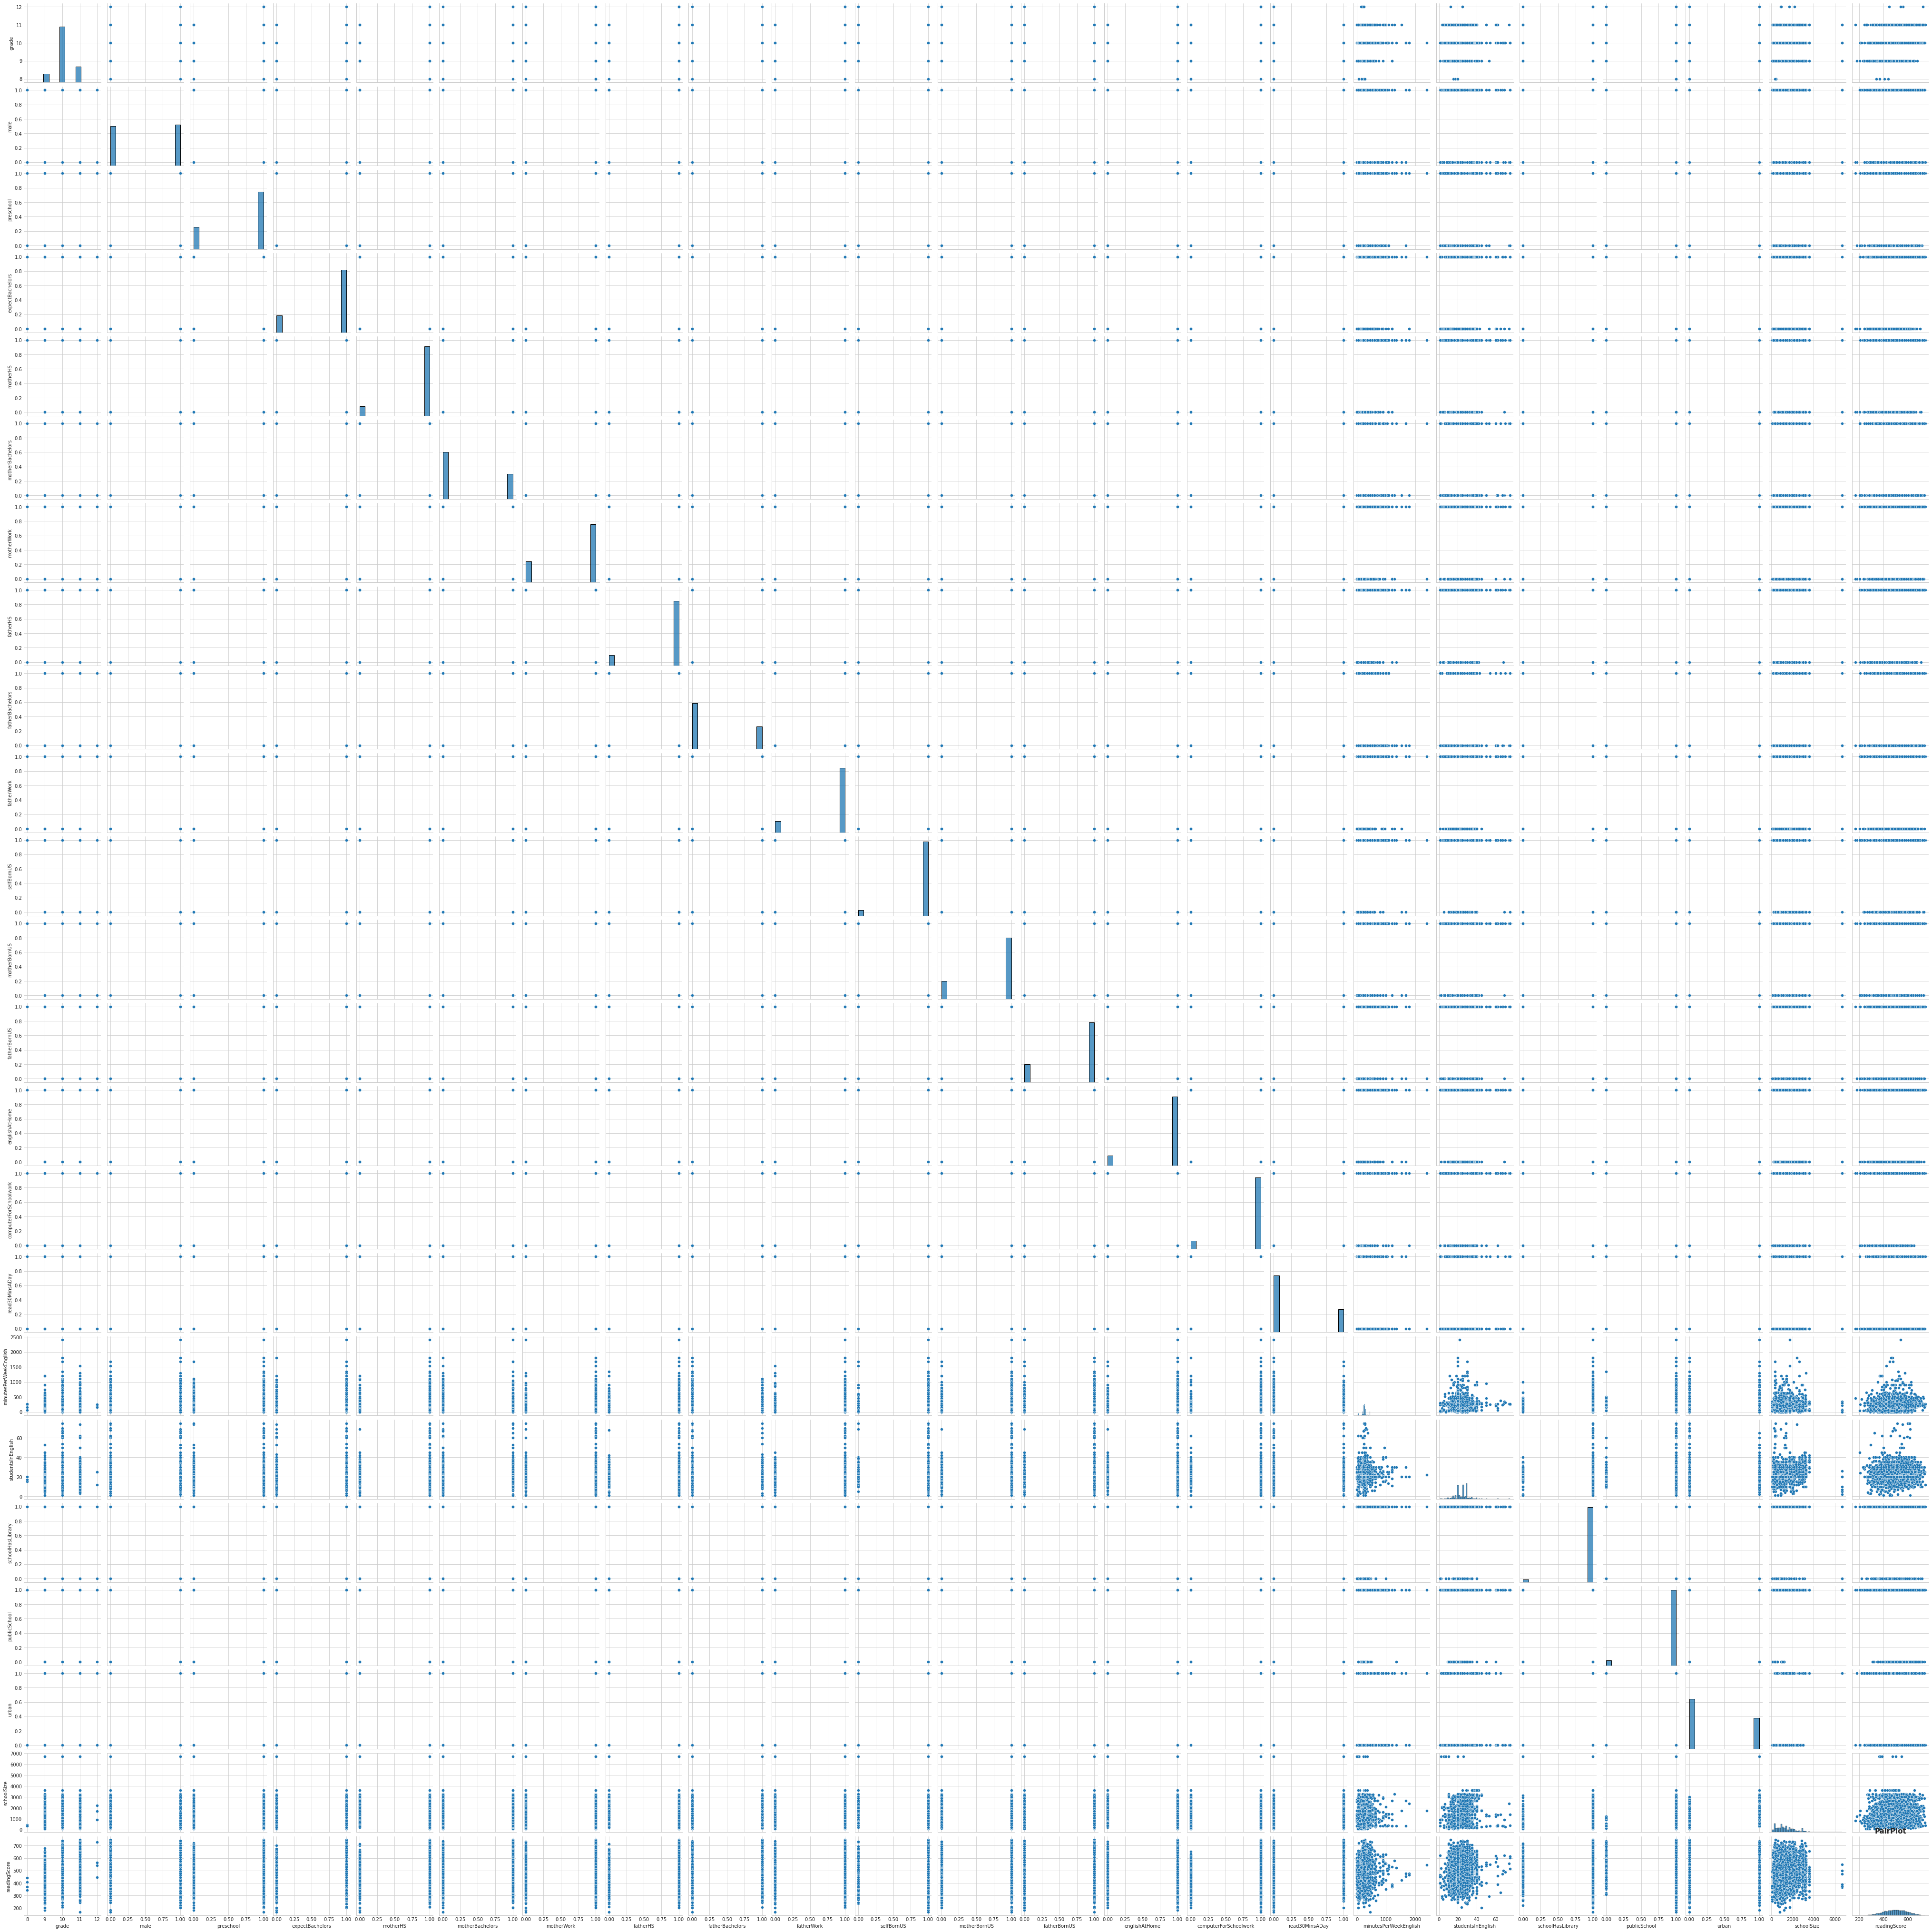

In [9]:
print(pd.DataFrame.corr(pisa_train))
sns.pairplot(pisa_train)

plt.title('PairPlot',fontsize=15,fontweight='bold')
plt.show()

<br>

#### ***(9) Plot showing distribution***
It is bell-shaped.

Text(0.5, 1.0, 'Distribution Plot')

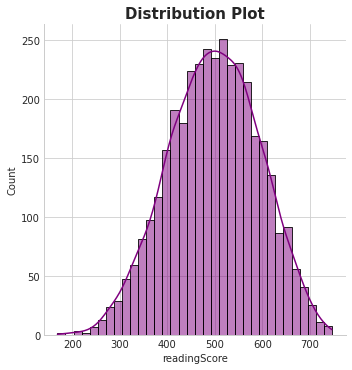

In [10]:
sns.displot(data=pisa_train, x='readingScore',kde=True,color='purple')
plt.title('Distribution Plot',fontsize=15,fontweight='bold')

# The option 'kde' means 'Kernal Density Estiamtion : It is a way to smoothing histogram which 
    # ref : https://darkpgmr.tistory.com/147

#### ***(10) Heat Map***
It is bell-shaped.

Text(0.5, 1.0, 'Heatmap')

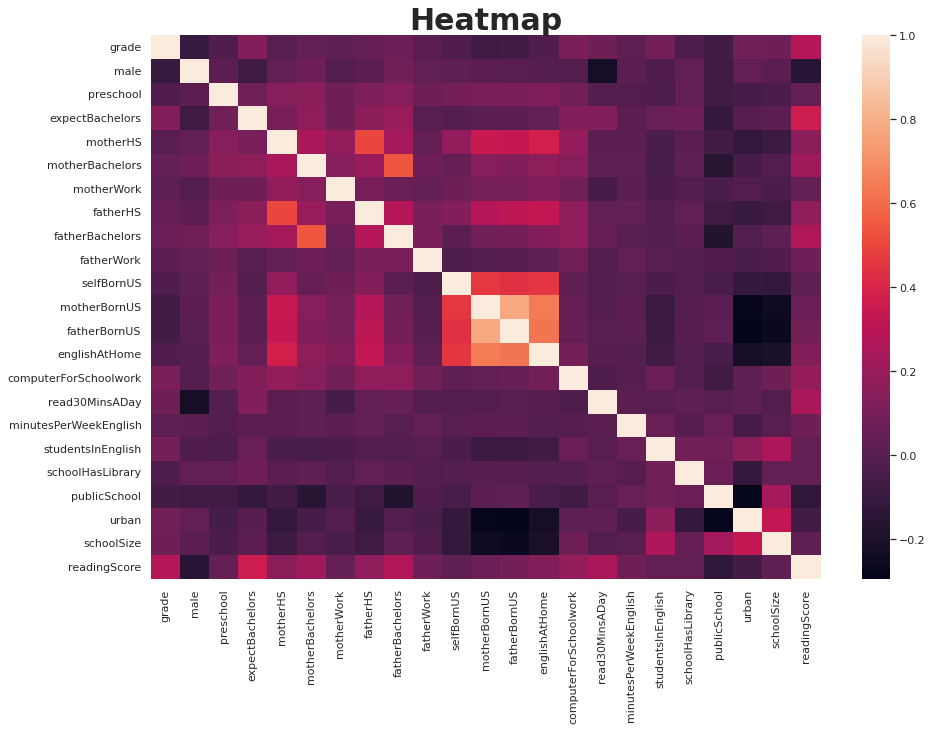

In [11]:

sns.set(rc = {'figure.figsize': (15,10)})
sns.heatmap(pisa_train.corr())
plt.title('Heatmap',fontsize=30,fontweight='bold')

<br>

### **1-2. Data Processing**

##### ***(1) Cleaning missing values***
In (1-1), we figured out there are lots of missing values by using isnull() method.<br>
Thus, we should handle with these and I'm gonna do that by using dropna to remove missing values.

In [12]:
pisa_train_p = pisa_train.dropna(axis=0)  # axis=0 option order that remove records which has na values in any fields.

print(pisa_train.isnull().sum())

grade                      0
male                       0
raceeth                   35
preschool                 56
expectBachelors           62
motherHS                  97
motherBachelors          397
motherWork                93
fatherHS                 245
fatherBachelors          569
fatherWork               233
selfBornUS                69
motherBornUS              71
fatherBornUS             113
englishAtHome             71
computerForSchoolwork     65
read30MinsADay            34
minutesPerWeekEnglish    186
studentsInEnglish        249
schoolHasLibrary         143
publicSchool               0
urban                      0
schoolSize               162
readingScore               0
dtype: int64


<br>

##### ***(2) Converting categorical variables to dummies***
There is only one categorical field in our dataset.
Following the plan in (1-1-bar chart : counts by race), I selected 'White' as the reference categories.

In [13]:
pisa_train_pd = pd.get_dummies( data= pisa_train_p, drop_first=True, columns=['raceeth'])

pisa_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2414 entries, 1 to 3662
Data columns (total 29 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   grade                                           2414 non-null   int64  
 1   male                                            2414 non-null   int64  
 2   preschool                                       2414 non-null   float64
 3   expectBachelors                                 2414 non-null   float64
 4   motherHS                                        2414 non-null   float64
 5   motherBachelors                                 2414 non-null   float64
 6   motherWork                                      2414 non-null   float64
 7   fatherHS                                        2414 non-null   float64
 8   fatherBachelors                                 2414 non-null   float64
 9   fatherWork                               

<br>

<br>

### **1-3. Model Building**

##### ***(1) Splitting into Testset & Trainset***
'pisa_train_p' should be splitted into Test & Train sets.

In [14]:
pisa_DV = pisa_train_pd['readingScore'] #y
pisa_IDV = pisa_train_pd[pisa_train_pd.columns.difference( ['readingScore'] )] #X

from sklearn.model_selection import train_test_split

pisaIDV_train,pisaIDV_test,pisaDV_train,pisaDV_test = train_test_split(pisa_IDV,pisa_DV,
                                                                       test_size= 0.4,
                                                                       random_state = 101)
print(len(pisaIDV_train))
print(len(pisaIDV_test))
print(len(pisaDV_train))
print(len(pisaDV_test))


1448
966
1448
966


<br>

##### ***(2) Building a Linear Regression Model***
Creating and Traing, and then showing coefficient values to DV of the indipendent variables

In [15]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression() # creating
lm.fit(pisaIDV_train,pisaDV_train) # training

# show coeffs
df_coeff_pisa = pd.DataFrame(lm.coef_, pisaIDV_train.columns, columns= ['Coefficient'])
print(df_coeff_pisa.sort_values('Coefficient',ascending=False))


                                                Coefficient
raceeth_Native Hawaiian/Other Pacific Islander    76.709966
raceeth_White                                     66.054311
raceeth_Asian                                     65.790118
expectBachelors                                   57.288457
raceeth_More than one race                        48.369949
read30MinsADay                                    34.782626
raceeth_Hispanic                                  30.387884
computerForSchoolwork                             28.925623
grade                                             25.936714
fatherBachelors                                   19.288237
motherBachelors                                   11.115375
fatherBornUS                                      10.098156
schoolHasLibrary                                   8.479658
selfBornUS                                         7.864888
englishAtHome                                      3.127928
urban                                   

<br>

##### ***(3) Predictions from the Model***

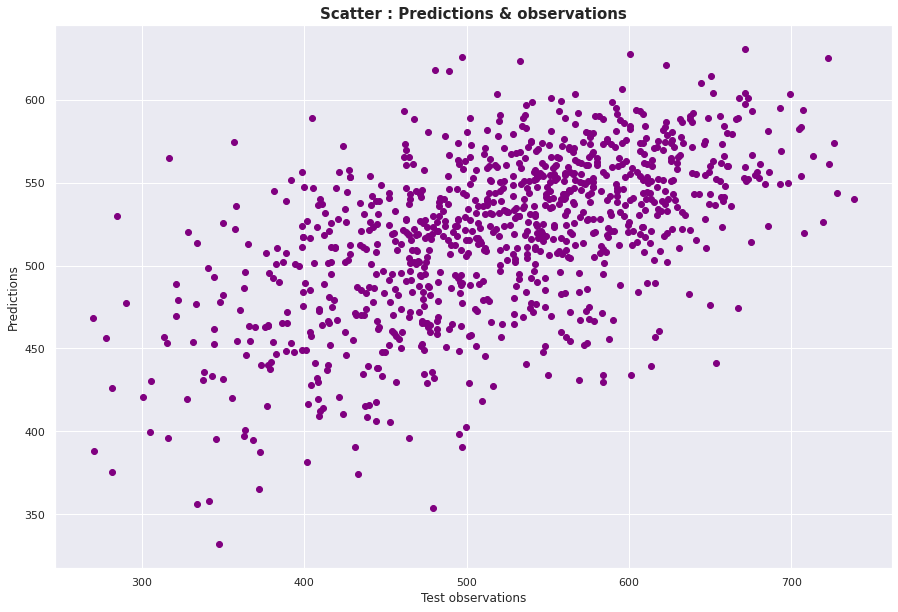

In [16]:
predictions = lm.predict(pisaIDV_test)

plt.scatter(pisaDV_test,predictions,color='purple')
plt.title('Scatter : Predictions & observations',fontsize=15,fontweight='bold')
plt.xlabel('Test observations')
plt.ylabel('Predictions')
plt.show()

<br>

### **1-4. Explanations on the model : Key Explainers**

In [17]:
print('(1) Holding all other features, whether an observation belongs to specific race group or not has a significant affection to \'reading score(DV)\' -> Especially, Pacific Icelander, Asian, White, Hispanic, and \'More than race\' are strong positive Explainers.')

print('(2) \'Read 30 minutes a day\' is also a main explainer about 34.87.. .')

print('(3) \'FatherBachelors\' & \'MotherBachelors\',\'fatherBornUs\' show impressive effections, we can put the fact from these that parents are important explainer for a student\'s reading score.')
print('(4) \'school Has Library\', \'self Born US\', \'computer For schoolwork\' are also have considerable effection, it means environments surrounding a student are important facotrs for readingScore.')
print('(5) On the other side, \'(is) public school\' has negative effect. It alludes that there is a huge environmental gap in an education between private schools and public schools.')

print('(6)\'(is) male\' also has negative effects. Gender is a also considerable factor in a predicting')


(1) Holding all other features, whether an observation belongs to specific race group or not has a significant affection to 'reading score(DV)' -> Especially, Pacific Icelander, Asian, White, Hispanic, and 'More than race' are strong positive Explainers.
(2) 'Read 30 minutes a day' is also a main explainer about 34.87.. .
(3) 'FatherBachelors' & 'MotherBachelors','fatherBornUs' show impressive effections, we can put the fact from these that parents are important explainer for a student's reading score.
(4) 'school Has Library', 'self Born US', 'computer For schoolwork' are also have considerable effection, it means environments surrounding a student are important facotrs for readingScore.
(5) On the other side, '(is) public school' has negative effect. It alludes that there is a huge environmental gap in an education between private schools and public schools.
(6)'(is) male' also has negative effects. Gender is a also considerable factor in a predicting


***Coefficients in (section 1-3) show follwing implications.***

1. *Holding all other features, whether an observation belongs to specific race group or not has a significant affection to 'reading score(DV)'* <br>
*-> Especially, Pacific Icelander, Asian, White, Hispanic, and 'More than race' are strong positive Explainers.*    <br>

2. *'Read 30 minutes a day' is main explainer about 34.78.. .*
3. *'FatherBachelors' & 'MotherBachelors','fatherBornUs' show impressive effections, we can put the fact from these that parents are important explainer for a student's reading score.*
4. *'school Has Library', 'self Born US', 'computer For schoolwork' are also have considerable effection, it means environments surrounding a student are important facotrs for readingScore.*
5. *On the other side, '(is) public school ' has negative effect'*|


<br>

### **1-5. Model Evaluation indices MAE, MSE, RMSE**

##### ***(1) Compare the actual score with prediction***

In [18]:
DV_test1 = pisaDV_test.to_frame()
DV_test1['Predictions'] = predictions
DV_test1.head()

,readingScore,Predictions
1040,598.16,563.309378
1493,560.11,576.543027
2336,535.88,590.814661
2310,458.21,455.733252
217,515.20,551.059046


<br>

##### ***(2) Resiudal Histogram***

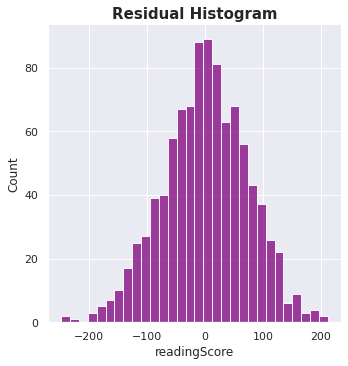

In [19]:
sns.displot((pisaDV_test-predictions),bins=30,color='purple')
plt.title('Residual Histogram',fontsize=15,fontweight='bold')
plt.show()


<br>

##### ***(3) Computing the errors***

In [20]:
DV_test1['Error'] = DV_test1['Predictions']-DV_test1['readingScore']
DV_test1.head()

,readingScore,Predictions,Error
1040,598.16,563.309378,-34.850622
1493,560.11,576.543027,16.433027
2336,535.88,590.814661,54.934661
2310,458.21,455.733252,-2.476748
217,515.20,551.059046,35.859046


<br>

##### ***(4) MAE, MSE, RMSE***

In [21]:

from sklearn import metrics

MSE = (sum(DV_test1['Error']**2))/len(DV_test1['Error']) 
MAE =(sum(DV_test1['Error'].abs())) / len(DV_test1['Error']) 
RMSE = np.sqrt(metrics.mean_squared_error(pisaDV_test, predictions))

print('MAE: ', MAE)
print('MSE: ', MSE)
print('RMSE: ', RMSE)

MAE:  57.76025686913125
MSE:  5313.293756259952
RMSE:  72.89234360520969


<br>

---

<br>